In [1688]:
# import libraries
import pandas as pd
import numpy as np
# import warnings
import warnings
warnings.filterwarnings('ignore')

In [1689]:
ci = pd.read_csv('data/consumer-index.csv')
prices = pd.read_csv('data/producer-price-global.csv')
xchange = pd.read_csv('data/exchange-rates.csv')


In [1690]:
xchange

,Domain Code,Domain,Area Code (M49),Area,ISO Currency Code (FAO),Currency,Element Code,Element,Year Code,Year,Months Code,Months,Unit,Value,Flag,Flag Description
0,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,2000,2000,7001,January,NaN,47357.574730,X,Figure from international organizations
1,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,2000,2000,7002,February,NaN,47357.574730,X,Figure from international organizations
2,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,2000,2000,7003,March,NaN,47357.574730,X,Figure from international organizations
3,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,2000,2000,7004,April,NaN,47357.574730,X,Figure from international organizations
4,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,2000,2000,7005,May,NaN,47357.574730,X,Figure from international organizations
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27102,PE,Exchange rates,887,Yemen,YER,Yemeni Rial,LCU,Local currency units per USD,2023,2023,7003,March,NaN,1241.790323,X,Figure from international organizations
27103,PE,Exchange rates,887,Yemen,YER,Yemeni Rial,LCU,Local currency units per USD,2023,2023,7004,April,NaN,1189.183333,X,Figure from international organizations
27104,PE,Exchange rates,887,Yemen,YER,Yemeni Rial,LCU,Local currency units per USD,2023,2023,7005,May,NaN,1273.241935,X,Figure from international organizations
27105,PE,Exchange rates,887,Yemen,YER,Yemeni Rial,LCU,Local currency units per USD,2023,2023,7006,June,NaN,1348.583333,X,Figure from international organizations


In [1691]:
def subset_data(df, item, country):
    subset = df[(df['Item'] == item) & (df['Area'] == country)]
    
    return subset

prices_germany = subset_data(prices, 'Wheat', 'Germany')
prices_spain = subset_data(prices, 'Wheat', 'Spain')



In [1692]:
def convert_to_date(df, year_col='Year', month_col='Months'):
    df[year_col] = df[year_col].astype(str)
    df[month_col] = df[month_col].astype(str)
    df['Date'] = df[year_col] + '-' + df[month_col]
    df['Date'] = pd.to_datetime(df['Date'])
    return df

#ci = convert_to_date(ci)
prices_germany = convert_to_date(prices_germany)
prices_spain = convert_to_date(prices_spain)



In [1693]:
def get_date_and_value(df, date_col='Date', value_col='Value'):
    df = df[[date_col, value_col]]
    return df.set_index(date_col)

wheat_germany = get_date_and_value(prices_germany)
wheat_spain = get_date_and_value(prices_spain)



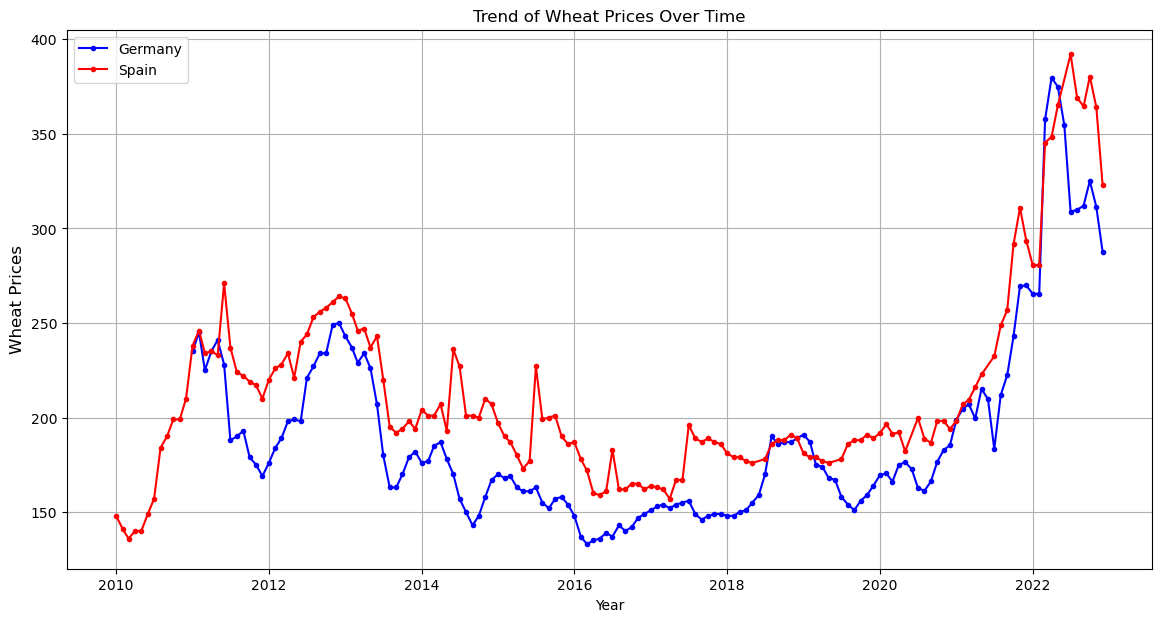

In [1694]:
import matplotlib.pyplot as plt
import pandas as pd

# # Sort the DataFrame by 'Date'
# data.sort_values('Date', inplace=True)

def plot_line(df1, x1, y1, df2, x2, y2, title, xlabel, ylabel, label1, label2):
    plt.figure(figsize=(14, 7))
    plt.plot(x1, y1, marker='.', color='blue', label=label1)
    plt.plot(x2, y2, marker='.', color='red', label=label2)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.show()

# # Usage:
plot_line(wheat_germany, wheat_germany.index, wheat_germany['Value'], 
          wheat_spain, wheat_spain.index, wheat_spain['Value'], 
          'Trend of Wheat Prices Over Time', 'Year', 'Wheat Prices', 'Germany', 'Spain')


In [1695]:
wheat_germany

,Value
Date,
2011-01-01,235.0
2011-02-01,245.0
2011-03-01,225.0
2011-04-01,235.0
2011-05-01,241.0
...,...
2022-08-01,309.8
2022-09-01,312.0
2022-10-01,325.1


In [1696]:
wheat_spain

,Value
Date,
2010-01-01,148.0
2010-02-01,141.0
2010-03-01,136.0
2010-04-01,140.0
2010-05-01,140.0
...,...
2022-08-01,369.2
2022-09-01,364.5
2022-10-01,380.3


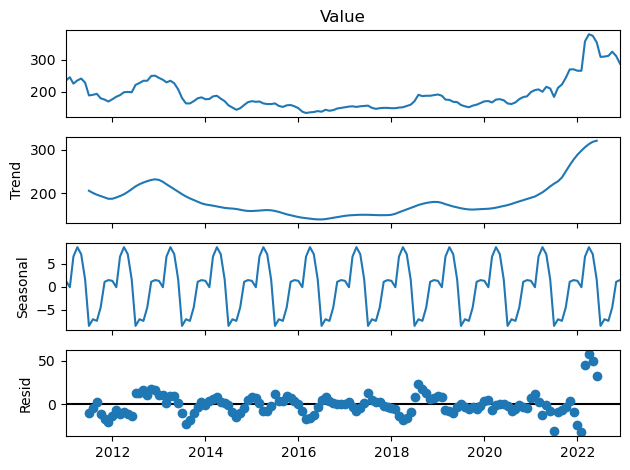

In [1697]:
# plot seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

def seasonal_decomposition(df):
    
    decomposition = seasonal_decompose(df['Value'], model='additive', period=12)
    fig = decomposition.plot()
    plt.show()

seasonal_decomposition(wheat_germany)





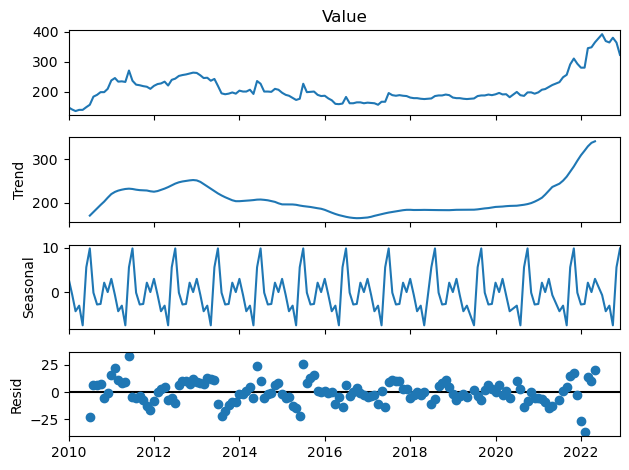

In [1698]:
seasonal_decomposition(wheat_spain)

In [1699]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller

def perform_adfuller_test(series):
    dftest = adfuller(series, autolag='AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)

#Usage:
perform_adfuller_test(wheat_germany['Value'])


1. ADF :  -0.21108363556987864
2. P-Value :  0.9371875175556861
3. Num Of Lags :  8
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 135
5. Critical Values :
	 1% :  -3.479742586699182
	 5% :  -2.88319822181578
	 10% :  -2.578319684499314


In [1700]:
# convert from stationary to non-stationary
def differencing(series, interval=1):
    return series.diff(interval)
  
# #Usage:
#cpfi_pakistan_diff = differencing(cpfi_pakistan['Value'])

In [1701]:
# take log of the series
def log_transform(series):
    return np.log(series)

#Usage:
wheat_germany['Value'] = log_transform(wheat_germany['Value'])
wheat_spain['Value'] = log_transform(wheat_spain['Value'])

# take diff also
wheat_germany['Value'] = differencing(wheat_germany_log).dropna()
wheat_spain['Value'] = differencing(wheat_spain_log).dropna()




In [1707]:
wheat_spain.dropna(inplace=True)
wheat_germany.dropna(inplace=True)

1. ADF :  -5.155000811736372
2. P-Value :  1.0855554665065604e-05
3. Num Of Lags :  7
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 135
5. Critical Values :
	 1% :  -3.479742586699182
	 5% :  -2.88319822181578
	 10% :  -2.578319684499314


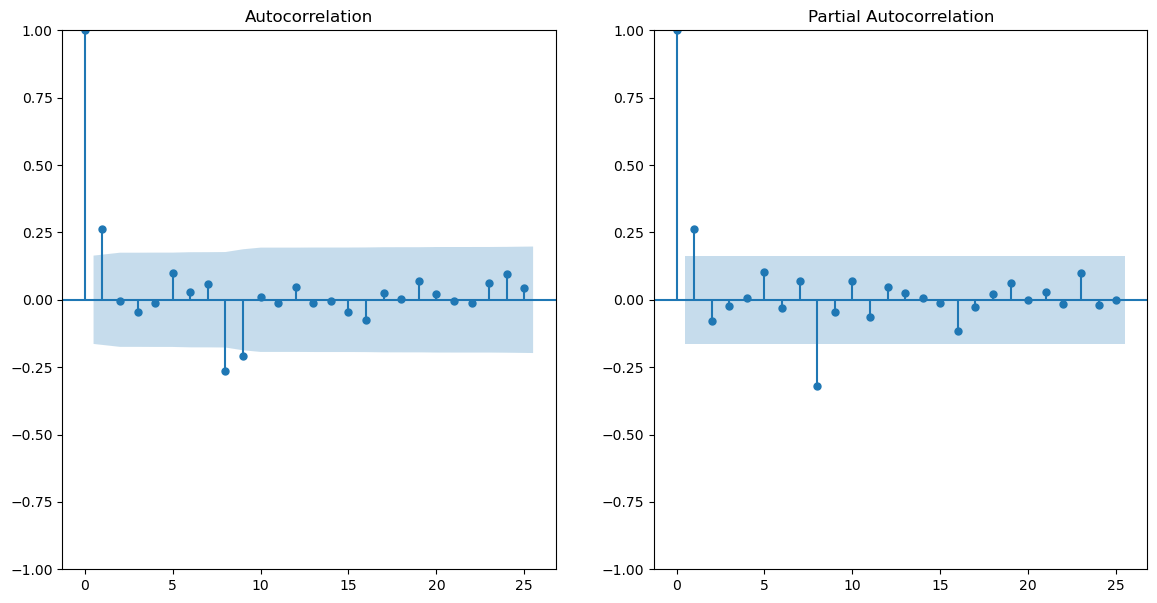

In [1738]:
perform_adfuller_test(wheat_germany['Value'])

# plot acf and pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_acf_pacf(series, lags):
    fig, ax = plt.subplots(1, 2, figsize=(14, 7))
    plot_acf(series, lags=lags, ax=ax[0])
    plot_pacf(series, lags=lags, ax=ax[1])
    plt.show()

#Usage:
plot_acf_pacf(wheat_germany['Value'], 25)




In [1709]:
X = wheat_germany['Value'].dropna().values

In [1728]:
train = X[:len(X)-7]
test = X[len(X)-7:]

model = AutoReg(train, lags=20).fit()

print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  136
Model:                    AutoReg(20)   Log Likelihood                 199.623
Method:               Conditional MLE   S.D. of innovations              0.043
Date:                Sun, 11 Feb 2024   AIC                           -355.247
Time:                        21:37:35   BIC                           -294.668
Sample:                            20   HQIC                          -330.655
                                  136                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0030      0.004      0.747      0.455      -0.005       0.011
y.L1           0.3781      0.093      4.075      0.000       0.196       0.560
y.L2          -0.0488      0.097     -0.501      0.6

In [1729]:
pred = model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

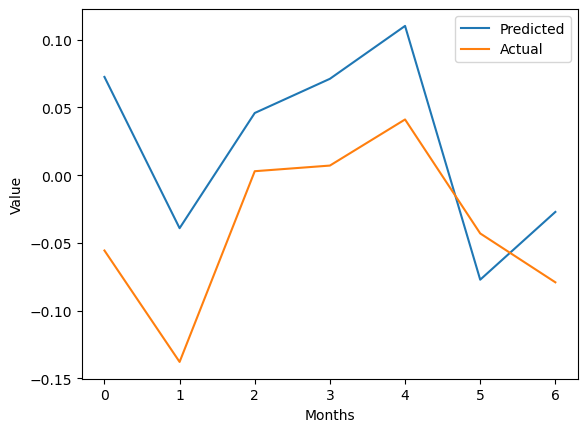

In [1730]:
# import pyplot
from matplotlib import pyplot
pyplot.plot(pred, label='Predicted')
pyplot.plot(test, label='Actual')

pyplot.xlabel('Months')
pyplot.ylabel('Value')

pyplot.legend()

In [1737]:
perform_adfuller_test(wheat_spain['Value'])

1. ADF :  -3.523156102718103
2. P-Value :  0.007411934503616701
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 138
5. Critical Values :
	 1% :  -3.47864788917503
	 5% :  -2.882721765644168
	 10% :  -2.578065326612056


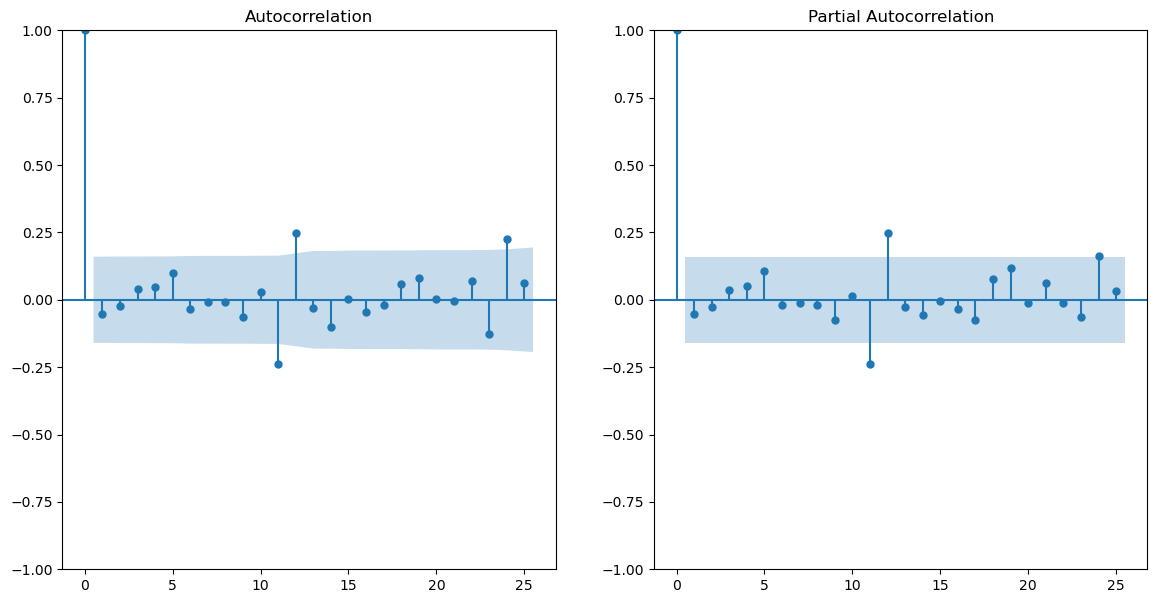

In [1739]:
plot_acf_pacf(wheat_spain['Value'], 25)

In [1747]:
X = wheat_spain['Value'].dropna().values

In [1762]:
train = X[:len(X)-7]
test = X[len(X)-7:]

model_spain = AutoReg(train, lags=20).fit()

print(model_spain.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  143
Model:                    AutoReg(20)   Log Likelihood                 200.403
Method:               Conditional MLE   S.D. of innovations              0.047
Date:                Sun, 11 Feb 2024   AIC                           -356.806
Time:                        21:43:36   BIC                           -294.938
Sample:                            20   HQIC                          -331.675
                                  143                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0031      0.004      0.708      0.479      -0.005       0.012
y.L1          -0.0569      0.090     -0.629      0.529      -0.234       0.120
y.L2           0.0133      0.093      0.143      0.8

In [1763]:
pred_spain = model_spain.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

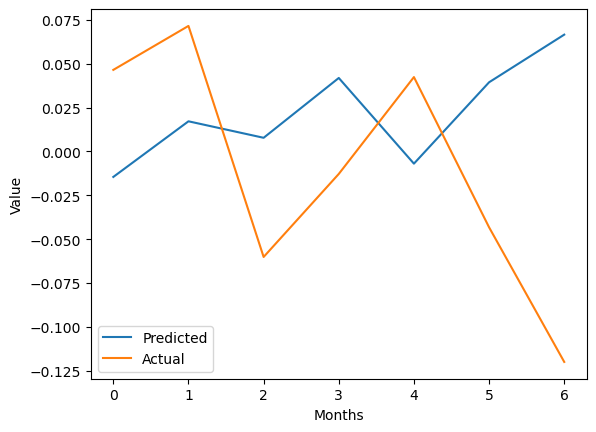

In [1764]:
# import pyplot
from matplotlib import pyplot
pyplot.plot(pred_spain, label='Predicted')
pyplot.plot(test, label='Actual')

pyplot.xlabel('Months')
pyplot.ylabel('Value')

pyplot.legend()

In [1751]:
# Calculate the mean squared erro
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test, pred))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.104


In [1732]:
# future prediction
pred_future = model.predict(start=len(X)+1, end=len(X)+24, dynamic=False)
print("The future prediction for the next 7 days is:")
print(pred_future)
print("Numbeer of predictions made: ", len(pred_future))


The future prediction for the next 7 days is:
[-0.08357208  0.07298639  0.09287388  0.0273359  -0.02892424  0.01961526
  0.07478581 -0.0690332   0.1411298   0.07778384 -0.07700917  0.01946099
  0.03519647  0.04595386 -0.01792502  0.11352179 -0.00926125 -0.10341583
  0.10458969  0.01417145  0.0009444   0.03435172  0.06002273 -0.04017136]
Numbeer of predictions made:  24


In [1733]:
last_date_in_data = wheat.index.max()


In [1734]:
import pandas as pd

# last_date_in_data should be a Timestamp object or string in the format 'YYYY-MM-DD'
# Convert string to Timestamp if necessary
if isinstance(last_date_in_data, str):
    last_date_in_data = pd.to_datetime(last_date_in_data)

# Generate a date range starting the first day of the next month after last_date_in_data
# 'MS' stands for month start frequency
future_dates = pd.date_range(start=last_date_in_data + pd.offsets.MonthBegin(1), periods=24, freq='MS')
# Create the predictions DataFrame with the pred_future list
predictions = pd.DataFrame(pred_future, columns=['Predicted'])
# Assign these dates as the index to the predictions DataFrame
predictions.index = future_dates
predictions.index.name = 'Date'

predictions["Predicted"] = (predictions["Predicted"] * 15762.675838	)  + 30246.590083

In [1735]:
prices = prices[prices['Item'] == 'Wheat']
prices.describe()

,Area Code (M49),Element Code,Item Code (CPC),Year Code,Year,Months Code,Value
count,6169.000000,6169.0,6169.0,6169.000000,6169.000000,6169.000000,6.169000e+03
mean,428.211379,5530.0,111.0,2016.224348,2016.224348,7006.504296,1.148178e+05
std,270.246897,0.0,0.0,3.731537,3.731537,3.450646,5.029890e+05
min,8.000000,5530.0,111.0,2010.000000,2010.000000,7001.000000,8.100000e+01
25%,170.000000,5530.0,111.0,2013.000000,2013.000000,7004.000000,2.290000e+02
50%,417.000000,5530.0,111.0,2016.000000,2016.000000,7007.000000,1.408000e+03
75%,688.000000,5530.0,111.0,2019.000000,2019.000000,7009.000000,2.078300e+04
max,887.000000,5530.0,111.0,2022.000000,2022.000000,7012.000000,8.716000e+06


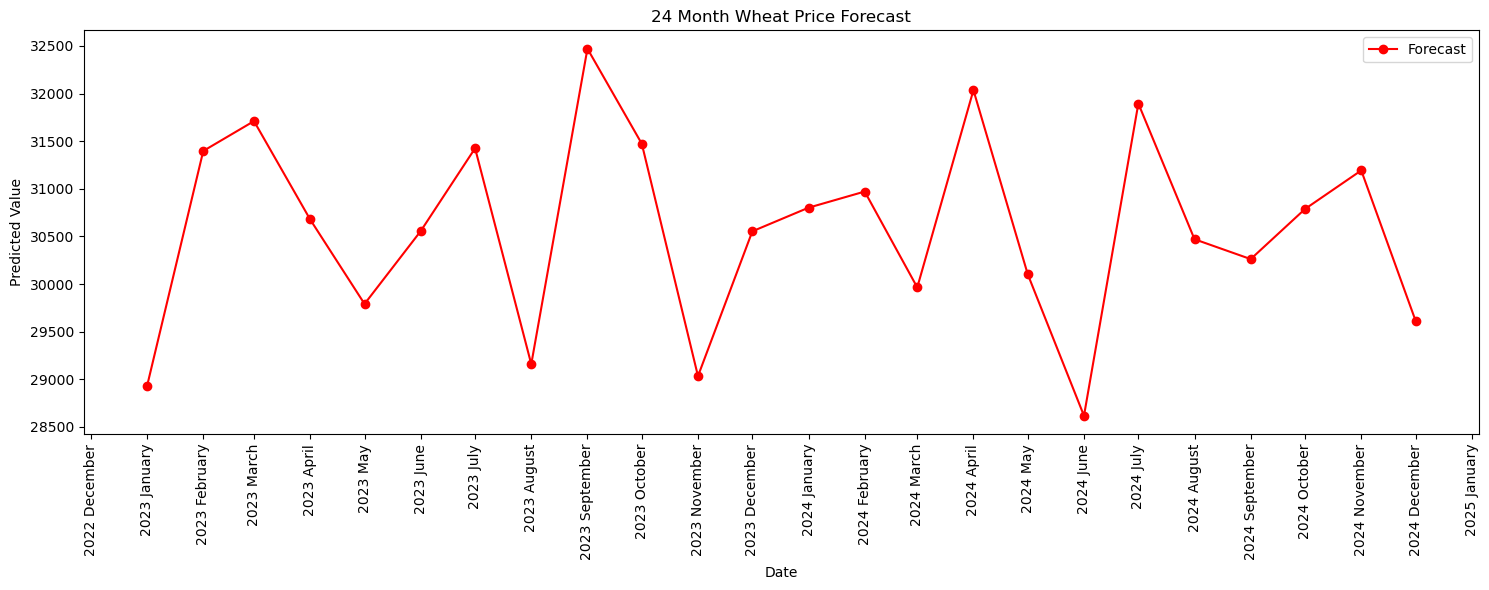

In [1736]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming `predictions` is a pandas Series with your 7-day forecast
# Ensure that 'predictions' has a DateTime index

# Plot the predictions
plt.figure(figsize=(15,6))
plt.plot(predictions.index, predictions, label='Forecast', color='red', marker='o')
# Define the date format
date_format = mdates.DateFormatter('%Y %B') 
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
# Add title and labels
plt.title('24 Month Wheat Price Forecast')
plt.xlabel('Date')
plt.ylabel('Predicted Value')

# Show legend
plt.legend()

# Rotate the date labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()  
plt.show()